In [1]:
#import the OS for getting the file path
import os, sys
os.getcwd()

'/Users/abhilash/Downloads'

In [2]:
# import the importnant libraries
import numpy as np
import pandas as pd
#data visulazation library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#importing and reading dataset
df=pd.read_csv("data_cardiovascular_risk.csv")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# find the five number summary
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# Data Analysis And Visualization

In [6]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [7]:
missing_values=pd.DataFrame({'missing_count':df.isnull().sum(),'missing_count %':df.isnull().sum()/len(df)*100})
missing_values

,missing_count,missing_count %
id,0,0.000000
age,0,0.000000
education,87,2.566372
sex,0,0.000000
is_smoking,0,0.000000
cigsPerDay,22,0.648968
BPMeds,44,1.297935
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000


In [8]:
#Replace the missing values for columns with mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(df['totChol'].mode()[0])
df['BMI'] = df['BMI'].fillna(df['BMI'].mode()[0])
df['glucose'] = df['glucose'].fillna(df['glucose'].mode()[0])
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].mode()[0])

In [9]:
df.duplicated().sum()

0

In [10]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [11]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [12]:
Mapping_cat_variable={'sex':{'F':0,'M':1},'is_smoking':{'NO':0,'YES':1}}

In [13]:
df=df.replace(Mapping_cat_variable)

In [14]:
# Now the bmi can be split into classes of bmi, which would help understand the data more.
bmi_ranges = [
    (df["BMI"] <= 15),                         # 0 - Anorexic
    (df["BMI"] > 15) & (df["BMI"] <= 18.5),    # 1 - Underweight
    (df["BMI"] > 18.5) & (df["BMI"] <= 25),    # 2 - Normal weight
    (df["BMI"] > 25) & (df["BMI"] <= 30),      # 3 - Overweight
    (df["BMI"] > 30) & (df["BMI"] <= 35),      # 4 - Obesity Class I
    (df["BMI"] > 35) & (df["BMI"] <= 40),      # 5 - Obesity Class II
    (df["BMI"] > 40)                           # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

df["BMI_class"] = np.select(bmi_ranges, classes)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BMI_class
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1,2
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,3
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,2
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,3


In [15]:
# Now the Cholestrol can be split into classes of Cholestrol, which would help understand the data more.
cholestrol_ranges = [
    (df["totChol"] <= 200),                         # 0 - Normal
    (df["totChol"] > 200) & (df["totChol"] <= 239),    # 1 - Elevated
    (df["totChol"] > 239)                     # 2 - High
]

classes = [0,1,2]

df["Cholestrol_Class"] = np.select(cholestrol_ranges, classes)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BMI_class,Cholestrol_Class
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1,2,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,3,1
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,2,2
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,3,2


In [16]:
glucose_ranges = [
    (df["glucose"] >70) & (df["glucose"] <= 100),                         # 1 - Normal
    (df["glucose"] > 100) & (df["glucose"] <= 125),                    # 2 - Risk of diabetes
    (df["glucose"] > 126)                                              # 3 - diabetes
]

classes = [0,1,2]

df["Glucose_Class"] = np.select(glucose_ranges, classes)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BMI_class,Cholestrol_Class,Glucose_Class
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1,2,1,0
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,3,1,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,2,2,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1,0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,3,2,0


In [17]:
heartRate_ranges = [
    (df["heartRate"] >60) & (df["heartRate"] <= 100),                         # 1 - Normal
    (df["heartRate"] > 100) & (df["heartRate"] <= 185),                    # 2 - Above Normal
    (df["heartRate"] > 185)                                              # 3 - Well above normal
]

classes = [0,1,2]

df["heartRate_Class"] = np.select(heartRate_ranges, classes)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BMI_class,Cholestrol_Class,Glucose_Class,heartRate_Class
0,0,64,2.0,0,1,3.0,0.0,0,0,0,...,148.0,85.0,22.91,90.0,80.0,1,2,1,0,0
1,1,36,4.0,1,0,0.0,0.0,0,1,0,...,168.0,98.0,29.77,72.0,75.0,0,3,1,0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,...,116.0,71.0,20.35,88.0,94.0,0,2,2,0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,...,158.0,88.0,28.26,68.0,94.0,1,3,1,0,0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,...,136.5,85.0,26.42,70.0,77.0,0,3,2,0,0


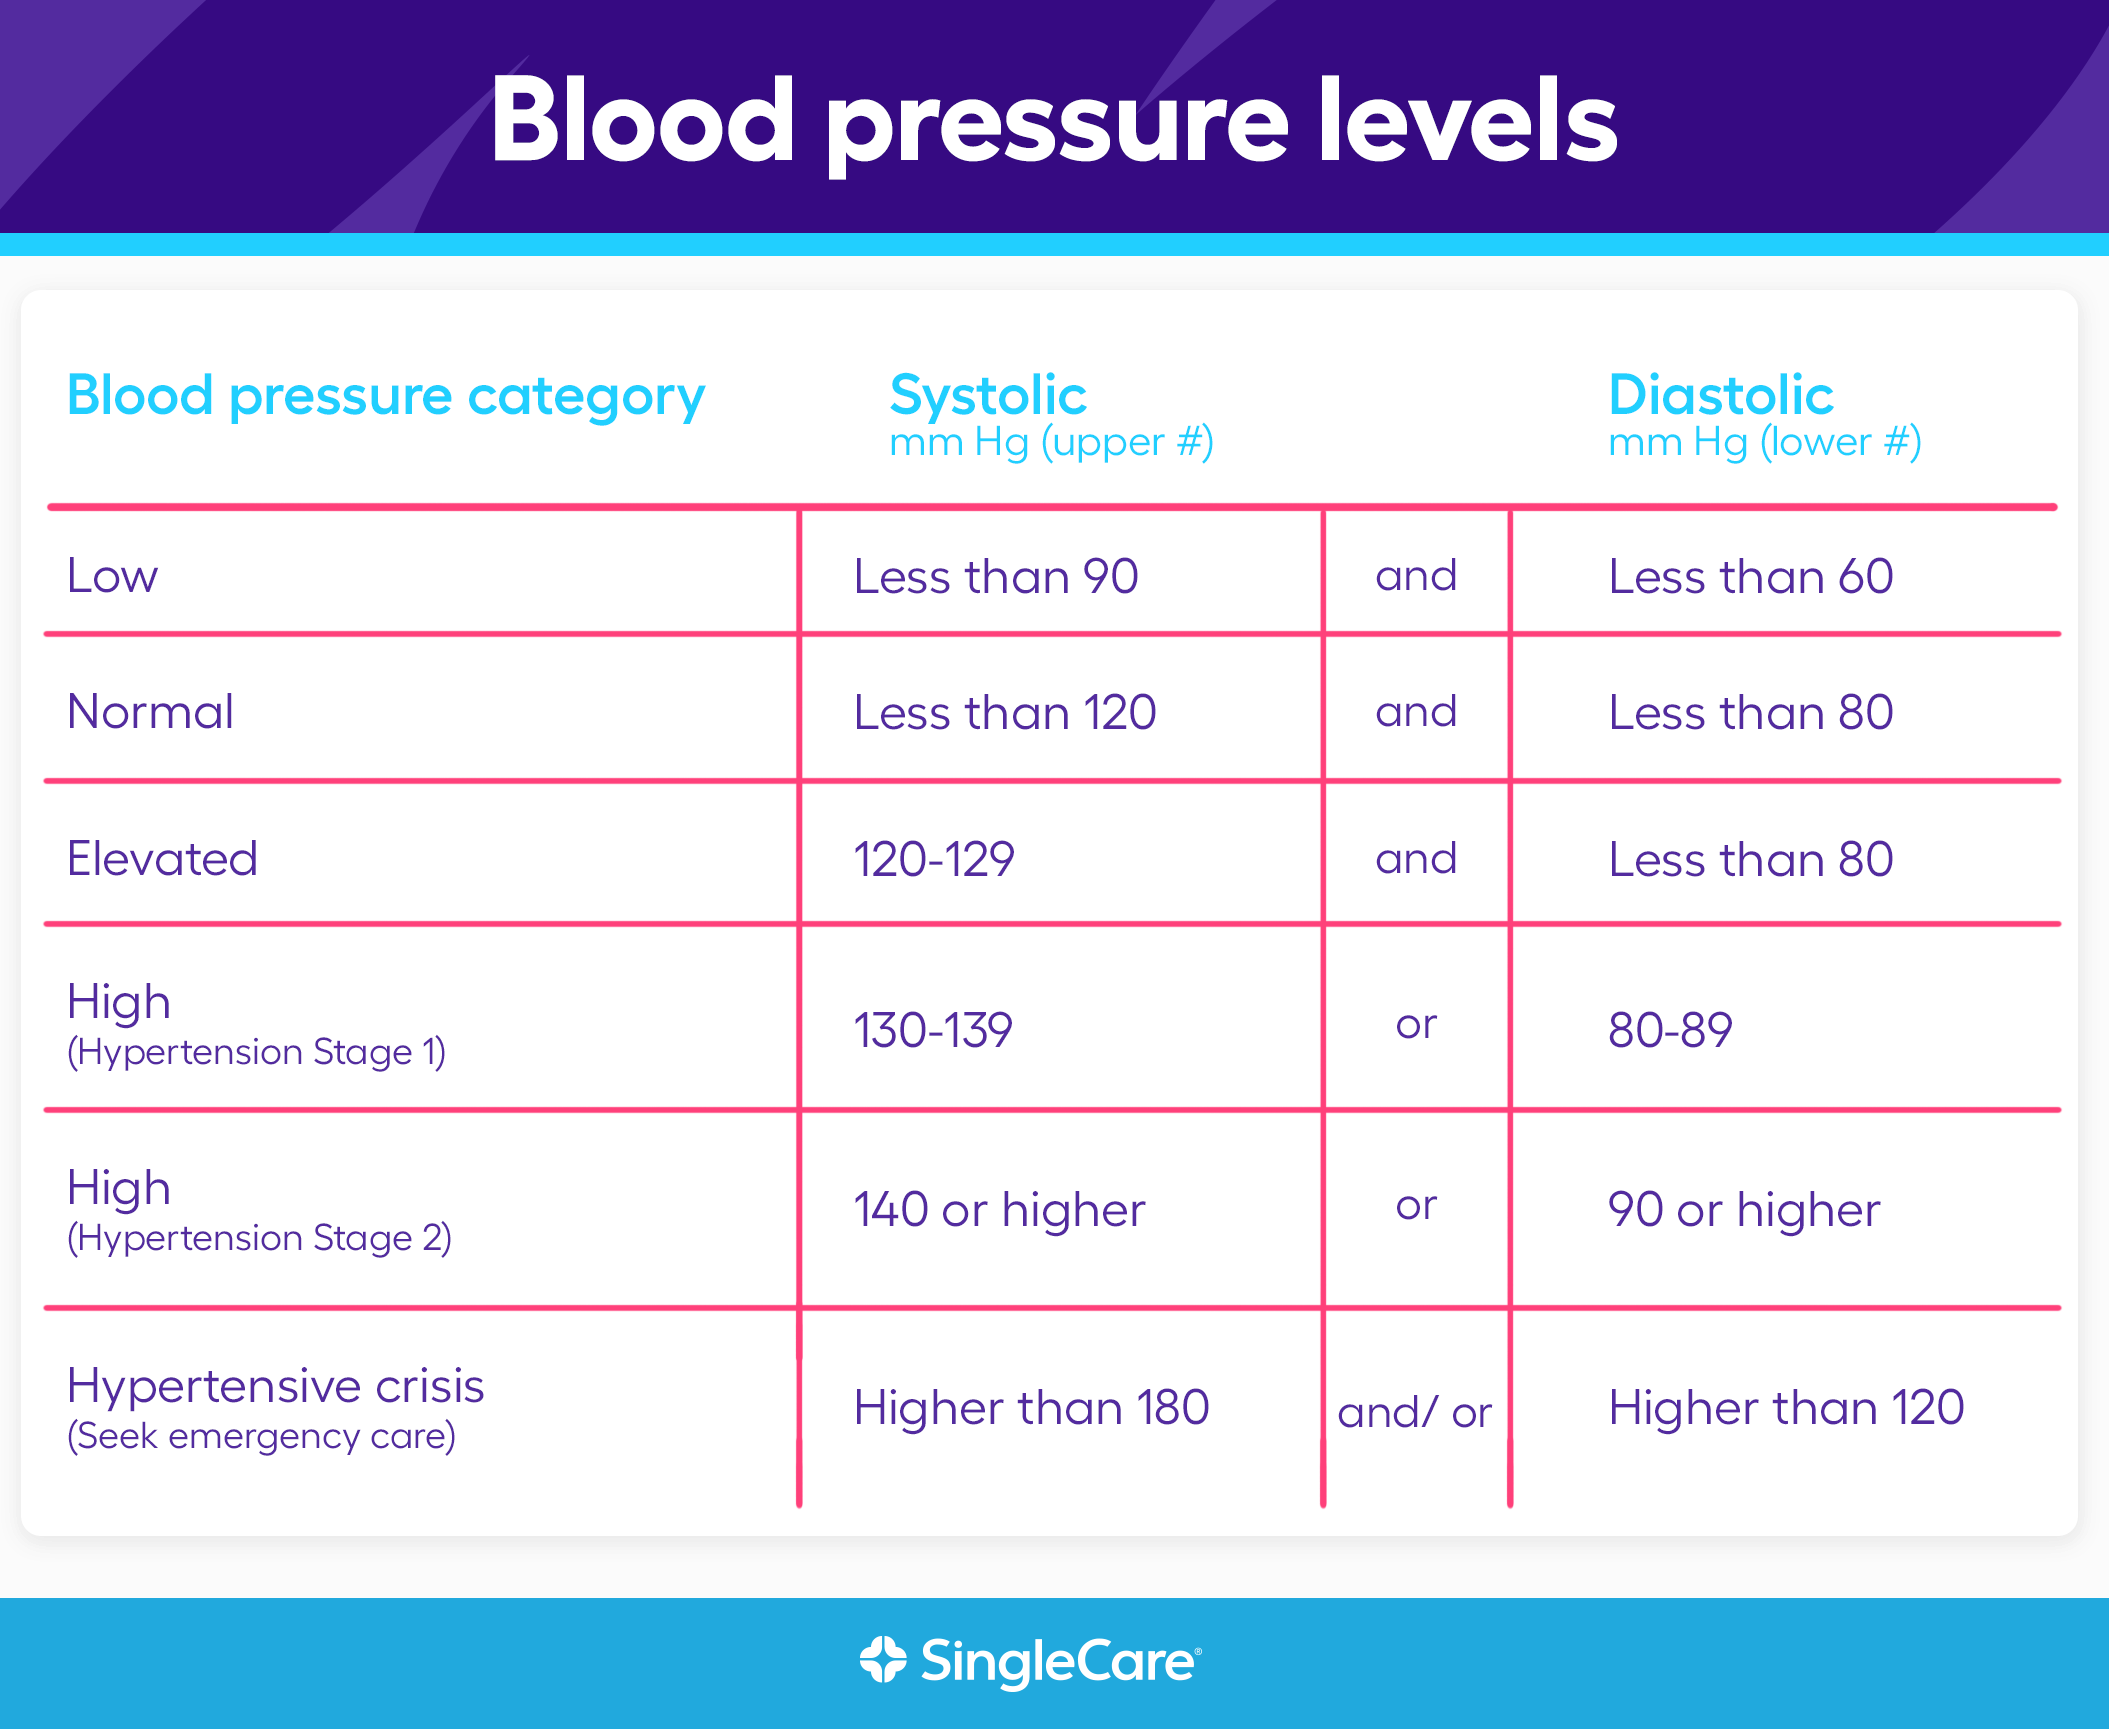

In [18]:
sysBP_ranges = [(df["sysBP"] <90),                                         # 0- Low
    (df["sysBP"] >90) & (df["sysBP"] <= 120),                         # 1 - Normal
    (df["sysBP"] > 120) & (df["sysBP"] <= 129),                    # 2 - Elevated
    (df["sysBP"] > 129)                                              # 3 - High
]

classes = [0,1,2,3]

df["sysBP_Class"] = np.select(sysBP_ranges, classes)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,diaBP,BMI,heartRate,glucose,TenYearCHD,BMI_class,Cholestrol_Class,Glucose_Class,heartRate_Class,sysBP_Class
0,0,64,2.0,0,1,3.0,0.0,0,0,0,...,85.0,22.91,90.0,80.0,1,2,1,0,0,3
1,1,36,4.0,1,0,0.0,0.0,0,1,0,...,98.0,29.77,72.0,75.0,0,3,1,0,0,3
2,2,46,1.0,0,1,10.0,0.0,0,0,0,...,71.0,20.35,88.0,94.0,0,2,2,0,0,1
3,3,50,1.0,1,1,20.0,0.0,0,1,0,...,88.0,28.26,68.0,94.0,1,3,1,0,0,3
4,4,64,1.0,0,1,30.0,0.0,0,0,0,...,85.0,26.42,70.0,77.0,0,3,2,0,0,3


In [19]:
diaBP_ranges = [(df["diaBP"] <60),                                         # 0- Low
    (df["diaBP"] >60) & (df["diaBP"] <= 80),                         # 1 - Normal
    (df["diaBP"] > 80) & (df["diaBP"] <= 89),                    # 2 - Elevated
    (df["diaBP"] > 89)                                              # 3 - High
]

classes = [0,1,2,3]

df["diaBP_Class"] = np.select(diaBP_ranges, classes)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,BMI,heartRate,glucose,TenYearCHD,BMI_class,Cholestrol_Class,Glucose_Class,heartRate_Class,sysBP_Class,diaBP_Class
0,0,64,2.0,0,1,3.0,0.0,0,0,0,...,22.91,90.0,80.0,1,2,1,0,0,3,2
1,1,36,4.0,1,0,0.0,0.0,0,1,0,...,29.77,72.0,75.0,0,3,1,0,0,3,3
2,2,46,1.0,0,1,10.0,0.0,0,0,0,...,20.35,88.0,94.0,0,2,2,0,0,1,1
3,3,50,1.0,1,1,20.0,0.0,0,1,0,...,28.26,68.0,94.0,1,3,1,0,0,3,2
4,4,64,1.0,0,1,30.0,0.0,0,0,0,...,26.42,70.0,77.0,0,3,2,0,0,3,2


<AxesSubplot: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

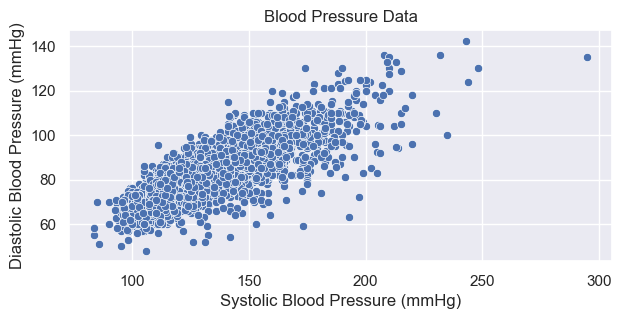

In [20]:
# Checking the blood pressure distribution of 'sysBP' and 'diaBP' columns for outliers.
plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = df, x = "sysBP", y = "diaBP")

In [21]:
df.describe()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,BMI,heartRate,glucose,TenYearCHD,BMI_class,Cholestrol_Class,Glucose_Class,heartRate_Class,sysBP_Class,diaBP_Class
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,...,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.946018,0.432743,0.497640,9.010619,0.029499,0.006490,0.315339,0.025664,...,25.783050,75.976991,81.451032,0.150737,2.688791,1.250442,0.094100,0.024484,2.157522,1.782006
std,978.753033,8.592878,1.017568,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,...,4.111106,11.970114,23.220277,0.357846,0.804361,0.776684,0.353285,0.154568,0.888250,0.843265
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.960000,45.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.972500,68.000000,72.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.365000,75.000000,77.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,2.000000
75%,2541.750000,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,...,27.997500,83.000000,85.000000,0.000000,3.000000,2.000000,0.000000,0.000000,3.000000,3.000000
max,3389.000000,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,...,56.800000,143.000000,394.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,3.000000


<AxesSubplot: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

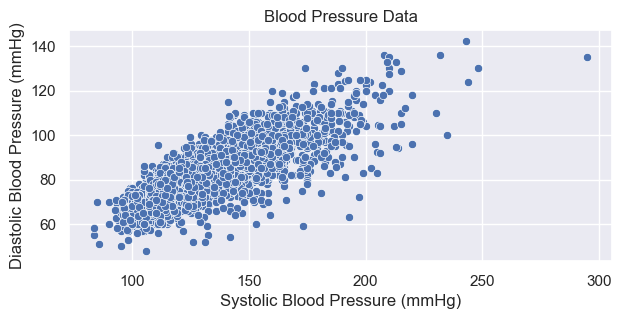

In [22]:
# The range of blood pressure mentioned in the dataset is exceeding out 295mmHg. So, the values of systolic pressure (sysBP) above 80 mm-Hg and below 300mmHg, whereas diastolic pressure (diaBP) above 20mmHg and below 360mmHg, should be taken into consideration.
plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = df[(df["sysBP"] < 300) & (df["diaBP"] < 150) & (df["sysBP"] > 80) & (df["diaBP"] > 40)], x = "sysBP", y = "diaBP")

In [23]:
x = df["Glucose_Class"].value_counts()/len(df["Glucose_Class"])*100
x

0    92.566372
1     5.457227
2     1.976401
Name: Glucose_Class, dtype: float64

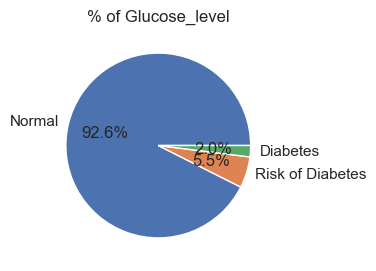

In [24]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['Normal','Risk of Diabetes','Diabetes'], autopct='%.1f%%')
plt.title("% of Glucose_level")
plt.show()

In [25]:
x=df['heartRate_Class'].value_counts()/len(df["heartRate_Class"])*100

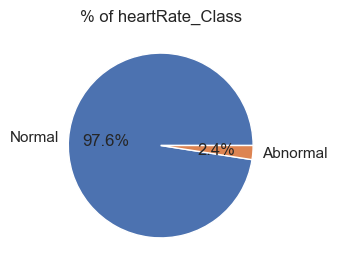

In [26]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['Normal','Abnormal'], autopct='%.1f%%')
plt.title("% of heartRate_Class")
plt.show()

In [27]:
x=df['BMI_class'].value_counts()/len(df["BMI_class"])*100
x

2    45.014749
3    40.914454
4    10.058997
5     2.153392
1     1.209440
6     0.648968
Name: BMI_class, dtype: float64

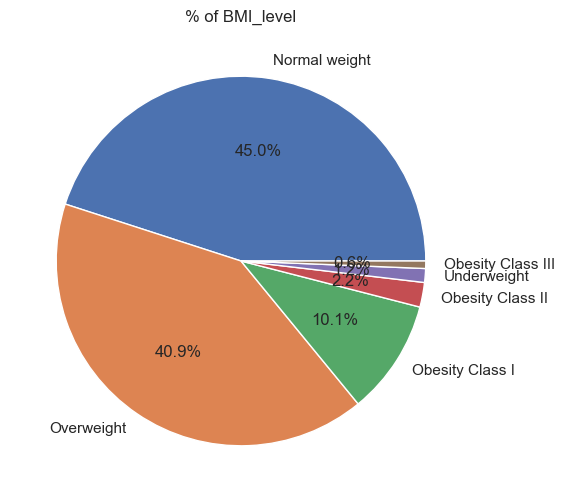

In [28]:
plt.figure(figsize=(10,6))
plt.pie(x,labels=['Normal weight','Overweight','Obesity Class I','Obesity Class II','Underweight','Obesity Class III'], autopct='%.1f%%')
plt.title("% of BMI_level")
plt.show()

In [29]:
x=df['Cholestrol_Class'].value_counts()/len(df["Cholestrol_Class"])*100
x

2    45.811209
1    33.421829
0    20.766962
Name: Cholestrol_Class, dtype: float64

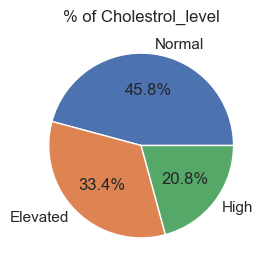

In [30]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['Normal','Elevated','High'], autopct='%.1f%%')
plt.title("% of Cholestrol_level")
plt.show()

In [31]:
x=df['BPMeds'].value_counts()/len(df["BPMeds"])*100
x

0.0    97.050147
1.0     2.949853
Name: BPMeds, dtype: float64

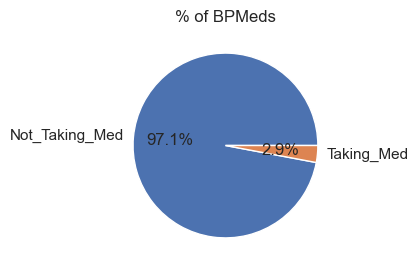

In [32]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['Not_Taking_Med','Taking_Med'], autopct='%.1f%%')
plt.title("% of BPMeds")
plt.show()

In [33]:
x=df['diabetes'].value_counts()/len(df["diabetes"])*100
x

0    97.433628
1     2.566372
Name: diabetes, dtype: float64

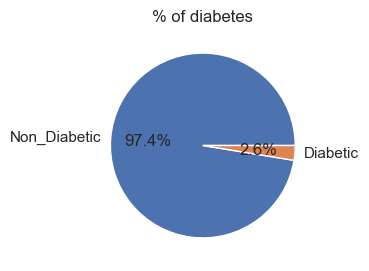

In [34]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['Non_Diabetic','Diabetic'], autopct='%.1f%%')
plt.title("% of diabetes")
plt.show()

In [35]:
x=df['prevalentStroke'].value_counts()/len(df["prevalentStroke"])*100
x

0    99.351032
1     0.648968
Name: prevalentStroke, dtype: float64

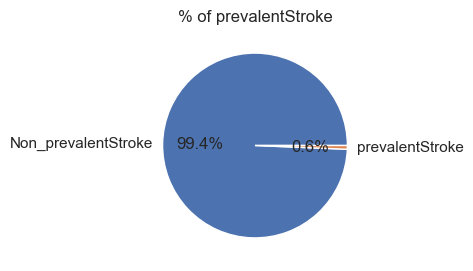

In [36]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['Non_prevalentStroke','prevalentStroke'], autopct='%.1f%%')
plt.title("% of prevalentStroke")
plt.show()


In [37]:
x=df['prevalentHyp'].value_counts()/len(df["prevalentHyp"])*100
x

0    68.466077
1    31.533923
Name: prevalentHyp, dtype: float64

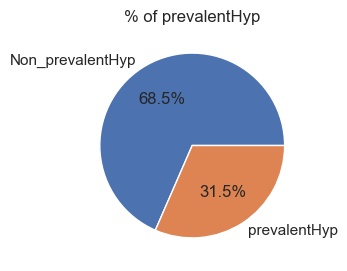

In [38]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['Non_prevalentHyp','prevalentHyp'], autopct='%.1f%%')
plt.title("% of prevalentHyp")
plt.show()

In [39]:
# Mean of BMI of a particular aged patients.
x=df.groupby("age")[[ "BMI"]].mean()
x.head()

,BMI
age,
32,29.840000
33,24.275000
34,23.345625
35,24.045517
36,25.206267


Text(0, 0.5, 'BMI')

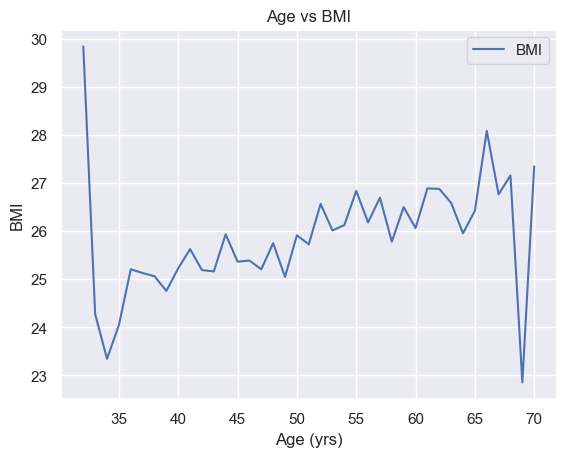

In [40]:
# Plotting age with respect to body-mass index (bmi).
df.groupby("age")[[ "BMI"]].mean().plot()
plt.title("Age vs BMI")
plt.xlabel("Age (yrs)")
plt.ylabel("BMI")

Text(0, 0.5, 'BMI')

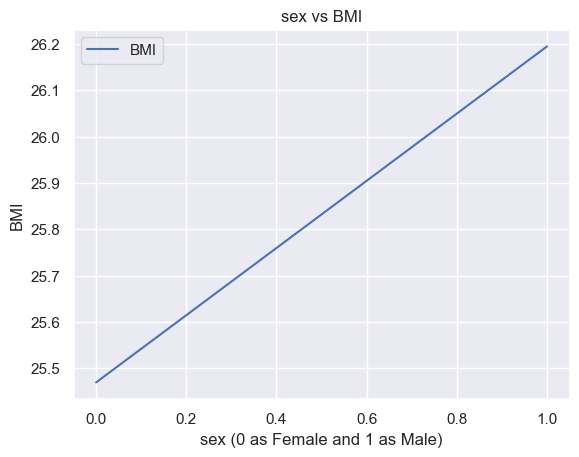

In [41]:
# Plotting sex with respect to body-mass index (bmi).
df.groupby("sex")[[ "BMI"]].mean().plot()
plt.title("sex vs BMI")
plt.xlabel("sex (0 as Female and 1 as Male)")
plt.ylabel("BMI")

Text(0, 0.5, 'Blood Pressure (mmHg)')

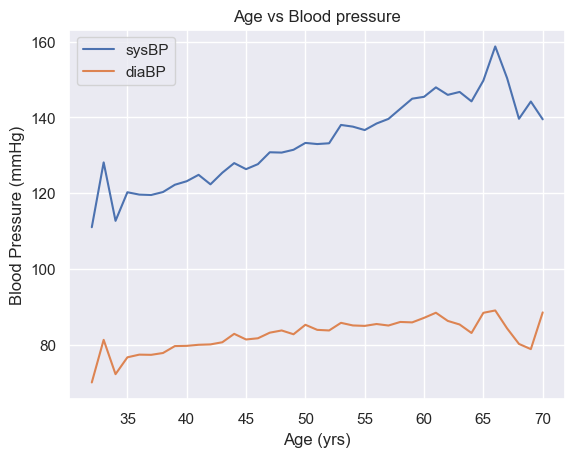

In [42]:
# Plotting age with respect to the blood pressure (both systolic and diastolic)
df.groupby("age")[[ "sysBP", "diaBP"]].mean().plot()
plt.title("Age vs Blood pressure")
plt.xlabel("Age (yrs)")
plt.ylabel("Blood Pressure (mmHg)")

Text(0, 0.5, 'Blood Pressure (mmHg)')

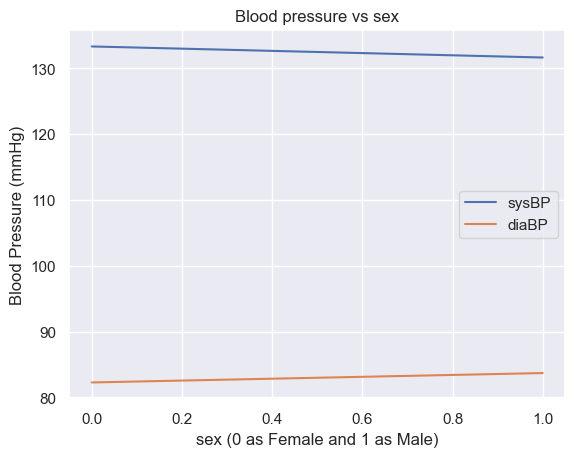

In [43]:
# Plotting sex with respect to the blood pressure (both systolic and diastolic)
df.groupby("sex")[[ "sysBP", "diaBP"]].mean().plot()
plt.title("Blood pressure vs sex")
plt.xlabel("sex (0 as Female and 1 as Male)")
plt.ylabel("Blood Pressure (mmHg)")

In [44]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,BMI,heartRate,glucose,TenYearCHD,BMI_class,Cholestrol_Class,Glucose_Class,heartRate_Class,sysBP_Class,diaBP_Class
0,0,64,2.0,0,1,3.0,0.0,0,0,0,...,22.91,90.0,80.0,1,2,1,0,0,3,2
1,1,36,4.0,1,0,0.0,0.0,0,1,0,...,29.77,72.0,75.0,0,3,1,0,0,3,3
2,2,46,1.0,0,1,10.0,0.0,0,0,0,...,20.35,88.0,94.0,0,2,2,0,0,1,1
3,3,50,1.0,1,1,20.0,0.0,0,1,0,...,28.26,68.0,94.0,1,3,1,0,0,3,2
4,4,64,1.0,0,1,30.0,0.0,0,0,0,...,26.42,70.0,77.0,0,3,2,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,...,29.28,70.0,103.0,0,3,2,1,0,2,1
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,...,21.96,80.0,84.0,0,2,0,0,0,1,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,...,28.92,73.0,72.0,1,3,2,0,0,3,3
3388,3388,60,1.0,1,0,0.0,0.0,0,1,0,...,23.01,80.0,85.0,0,2,0,0,0,3,3


In [45]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'BMI_class',
       'Cholestrol_Class', 'Glucose_Class', 'heartRate_Class', 'sysBP_Class',
       'diaBP_Class'],
      dtype='object')

In [46]:
# To change the position of columns classes from the end.
df = df.loc[:,['age','sex', 'is_smoking','prevalentHyp','sysBP_Class','diaBP_Class','BMI_class',
       'Cholestrol_Class', 'Glucose_Class','TenYearCHD']]
df

,age,sex,is_smoking,prevalentHyp,sysBP_Class,diaBP_Class,BMI_class,Cholestrol_Class,Glucose_Class,TenYearCHD
0,64,0,1,0,3,2,2,1,0,1
1,36,1,0,1,3,3,3,1,0,0
2,46,0,1,0,1,1,2,2,0,0
3,50,1,1,1,3,2,3,1,0,1
4,64,0,1,0,3,2,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0,0,2,1,3,2,1,0
3386,46,0,0,0,1,0,2,0,0,0
3387,44,1,1,1,3,3,3,2,0,1
3388,60,1,0,1,3,3,2,0,0,0


In [47]:
# Rename the name of the column 'TenYearCHD' to 'cvd' for better understanding.
df.rename(columns = {'TenYearCHD':'CVD(Y/N)'}, inplace = True)
df.head()

,age,sex,is_smoking,prevalentHyp,sysBP_Class,diaBP_Class,BMI_class,Cholestrol_Class,Glucose_Class,CVD(Y/N)
0,64,0,1,0,3,2,2,1,0,1
1,36,1,0,1,3,3,3,1,0,0
2,46,0,1,0,1,1,2,2,0,0
3,50,1,1,1,3,2,3,1,0,1
4,64,0,1,0,3,2,3,2,0,0


In [48]:
# To check the percentage of patients having cardiovascular disease or not as given in the 'cvd' column.
x=df["CVD(Y/N)"].value_counts()/len(df["CVD(Y/N)"])*100
x

0    84.926254
1    15.073746
Name: CVD(Y/N), dtype: float64

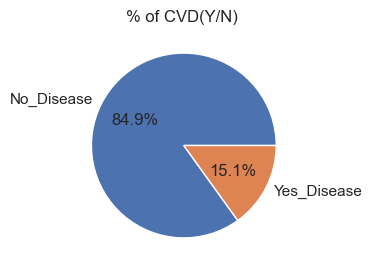

In [49]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['No_Disease','Yes_Disease'], autopct='%.1f%%')
plt.title("% of CVD(Y/N) ")
plt.show()

<AxesSubplot: xlabel='CVD(Y/N)', ylabel='count'>

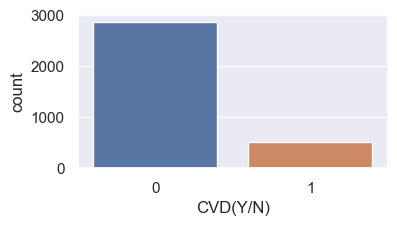

In [50]:
plt.figure(figsize = (4,2))
sns.countplot(data = df, x = "CVD(Y/N)")

In [51]:
x=df["is_smoking"].value_counts()/len(df["is_smoking"])*100
x

0    50.235988
1    49.764012
Name: is_smoking, dtype: float64

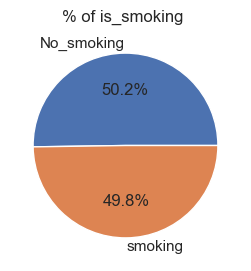

In [52]:
plt.figure(figsize=(5,3))
plt.pie(x,labels=['No_smoking','smoking'], autopct='%.1f%%')
plt.title("% of is_smoking ")
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               3390 non-null   int64
 1   sex               3390 non-null   int64
 2   is_smoking        3390 non-null   int64
 3   prevalentHyp      3390 non-null   int64
 4   sysBP_Class       3390 non-null   int64
 5   diaBP_Class       3390 non-null   int64
 6   BMI_class         3390 non-null   int64
 7   Cholestrol_Class  3390 non-null   int64
 8   Glucose_Class     3390 non-null   int64
 9   CVD(Y/N)          3390 non-null   int64
dtypes: int64(10)
memory usage: 265.0 KB


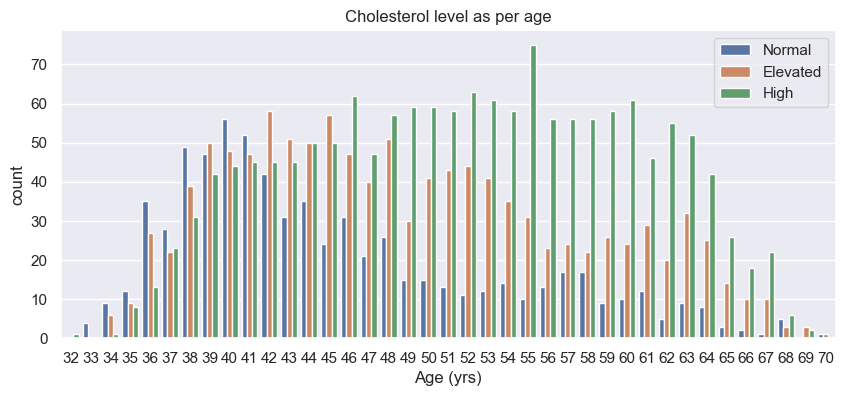

In [54]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "Cholestrol_Class")
plt.title("Cholesterol level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Elevated", "High"])

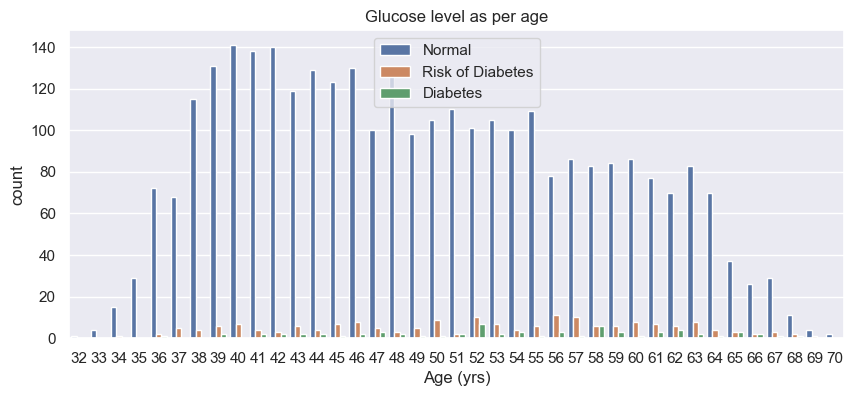

In [55]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "Glucose_Class")
plt.title("Glucose level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Risk of Diabetes", "Diabetes"])

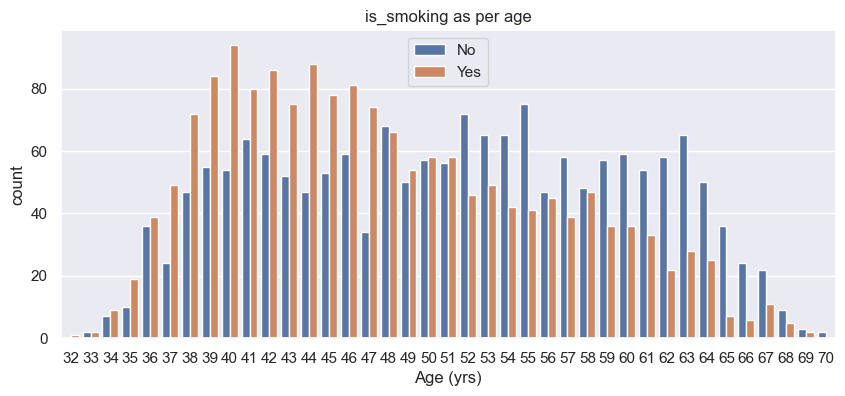

In [56]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "is_smoking")
plt.title("is_smoking as per age")
plt.xlabel("Age (yrs)")
plt.legend(["No", "Yes"])

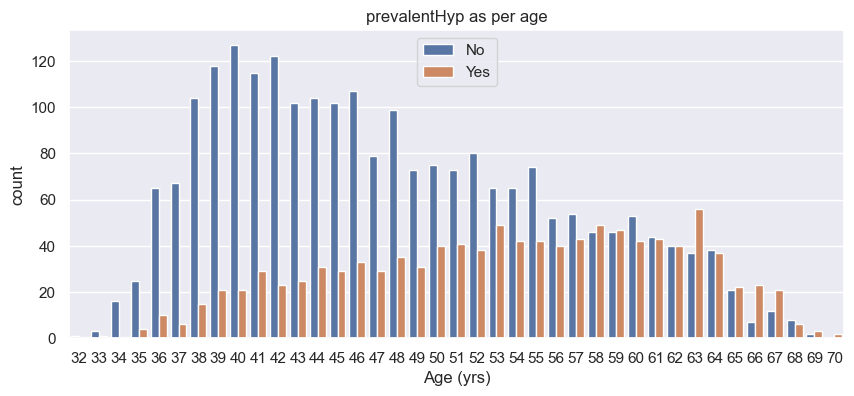

In [57]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "prevalentHyp")
plt.title("prevalentHyp as per age")
plt.xlabel("Age (yrs)")
plt.legend(["No", "Yes"])

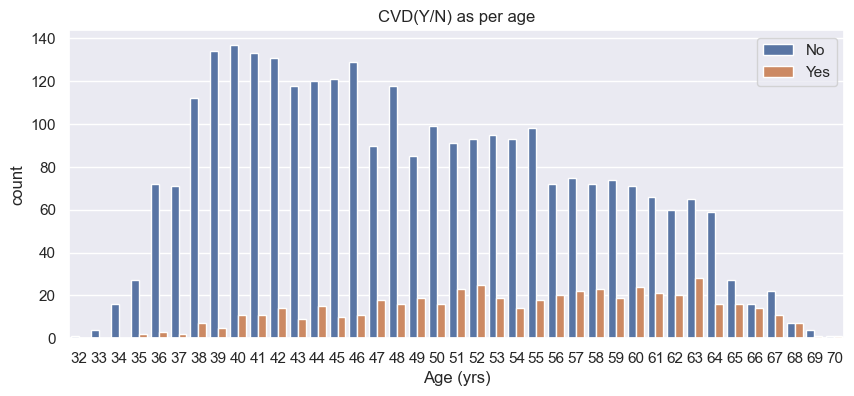

In [58]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "CVD(Y/N)")
plt.title("CVD(Y/N) as per age")
plt.xlabel("Age (yrs)")
plt.legend(["No", "Yes"])

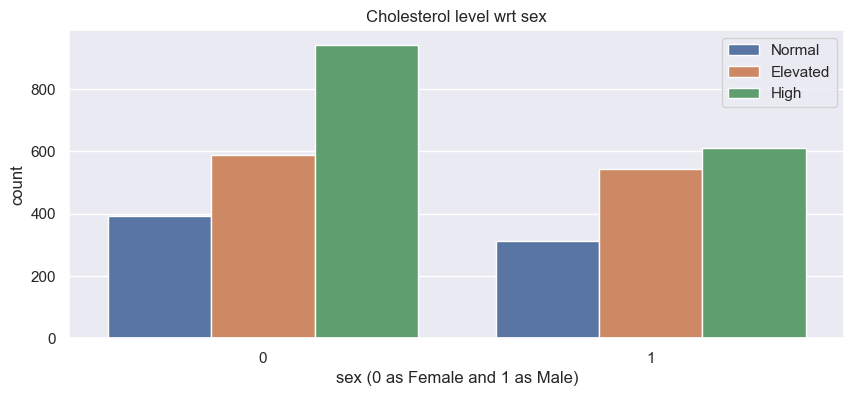

In [59]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "sex",  hue = "Cholestrol_Class")
plt.title("Cholesterol level wrt sex")
plt.xlabel("sex (0 as Female and 1 as Male)")
plt.legend(["Normal", "Elevated", "High"])

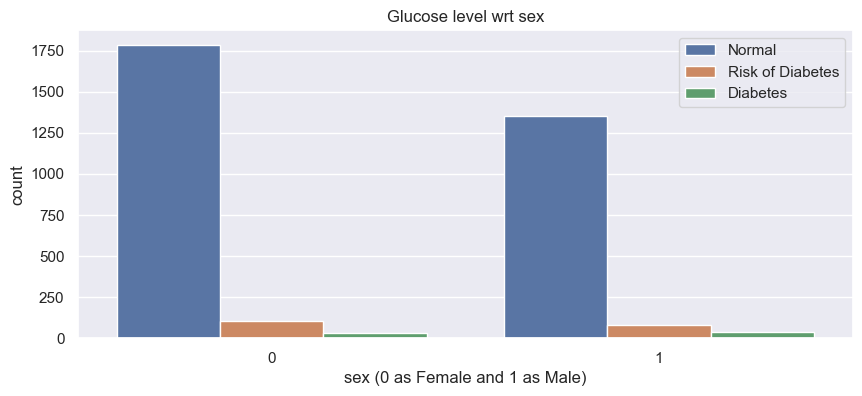

In [60]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "sex",  hue = "Glucose_Class")
plt.title("Glucose level wrt sex")
plt.xlabel("sex (0 as Female and 1 as Male)")
plt.legend(["Normal", "Risk of Diabetes", "Diabetes"])

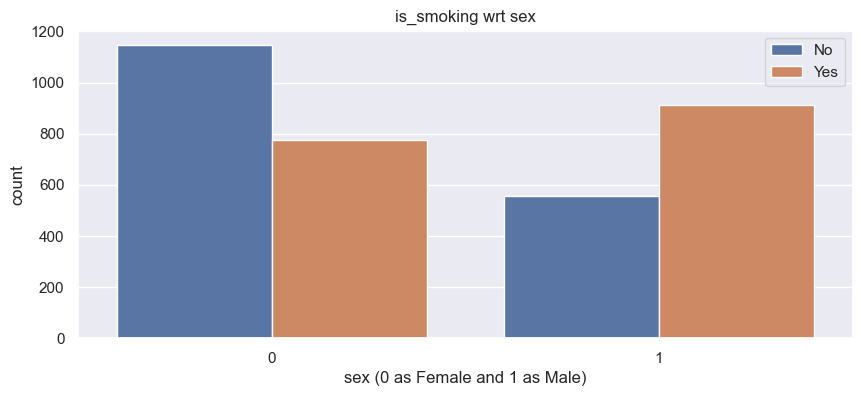

In [61]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "sex",  hue = "is_smoking")
plt.title("is_smoking wrt sex")
plt.xlabel("sex (0 as Female and 1 as Male)")
plt.legend(["No", "Yes"])

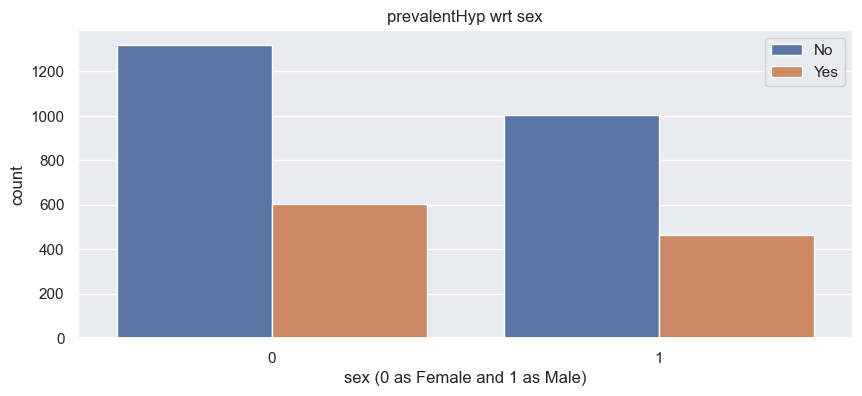

In [62]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "sex",  hue = "prevalentHyp")
plt.title("prevalentHyp wrt sex")
plt.xlabel("sex (0 as Female and 1 as Male)")
plt.legend(["No", "Yes"])

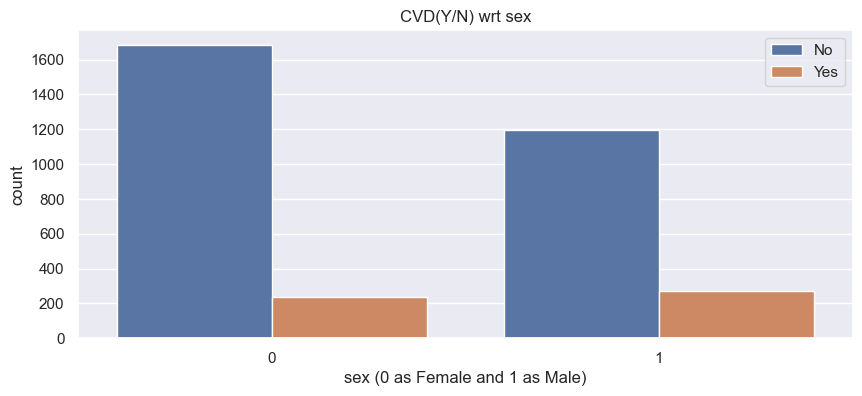

In [63]:
# Plotting age with respect to cholesterol level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "sex",  hue = "CVD(Y/N)")
plt.title("CVD(Y/N) wrt sex")
plt.xlabel("sex (0 as Female and 1 as Male)")
plt.legend(["No", "Yes"])

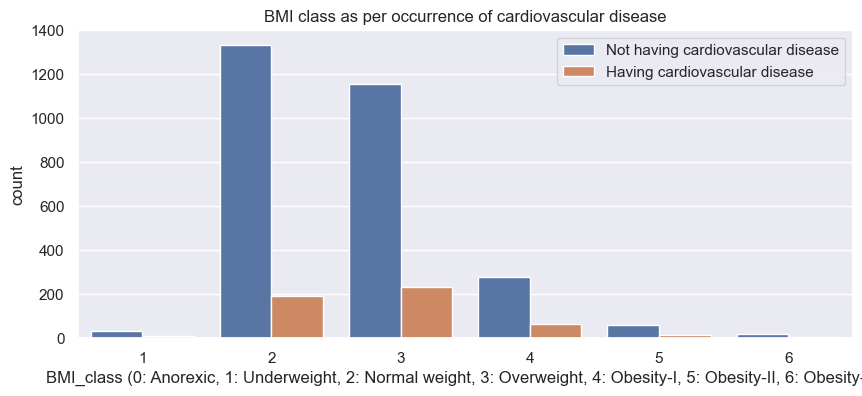

In [64]:
# Plotting BMI class with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "BMI_class",  hue = "CVD(Y/N)")
plt.title("BMI class as per occurrence of cardiovascular disease")
plt.xlabel("BMI_class (0: Anorexic, 1: Underweight, 2: Normal weight, 3: Overweight, 4: Obesity-I, 5: Obesity-II, 6: Obesity-III)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

In [65]:
df.columns

Index(['age', 'sex', 'is_smoking', 'prevalentHyp', 'sysBP_Class',
       'diaBP_Class', 'BMI_class', 'Cholestrol_Class', 'Glucose_Class',
       'CVD(Y/N)'],
      dtype='object')

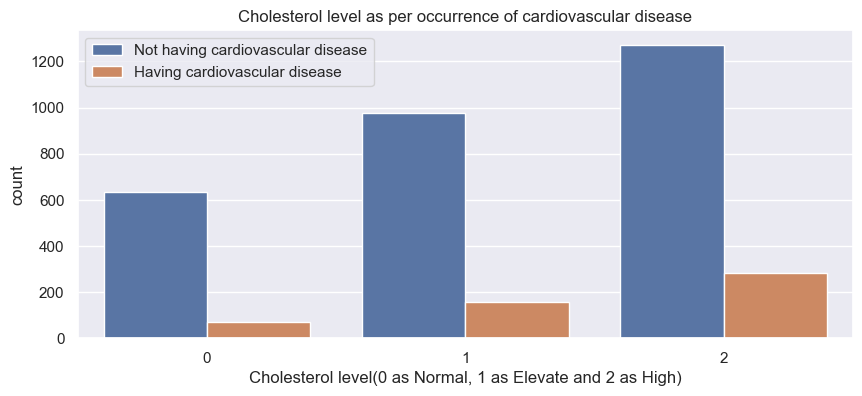

In [66]:
# Plotting cholesterol level with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "Cholestrol_Class",  hue = "CVD(Y/N)")
plt.title("Cholesterol level as per occurrence of cardiovascular disease")
plt.xlabel("Cholesterol level(0 as Normal, 1 as Elevate and 2 as High)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

In [67]:
df.columns

Index(['age', 'sex', 'is_smoking', 'prevalentHyp', 'sysBP_Class',
       'diaBP_Class', 'BMI_class', 'Cholestrol_Class', 'Glucose_Class',
       'CVD(Y/N)'],
      dtype='object')

In [68]:
columns1=['age','is_smoking', 'prevalentHyp', 'sysBP_Class',
       'diaBP_Class', 'BMI_class', 'Cholestrol_Class', 'Glucose_Class',
       'CVD(Y/N)']

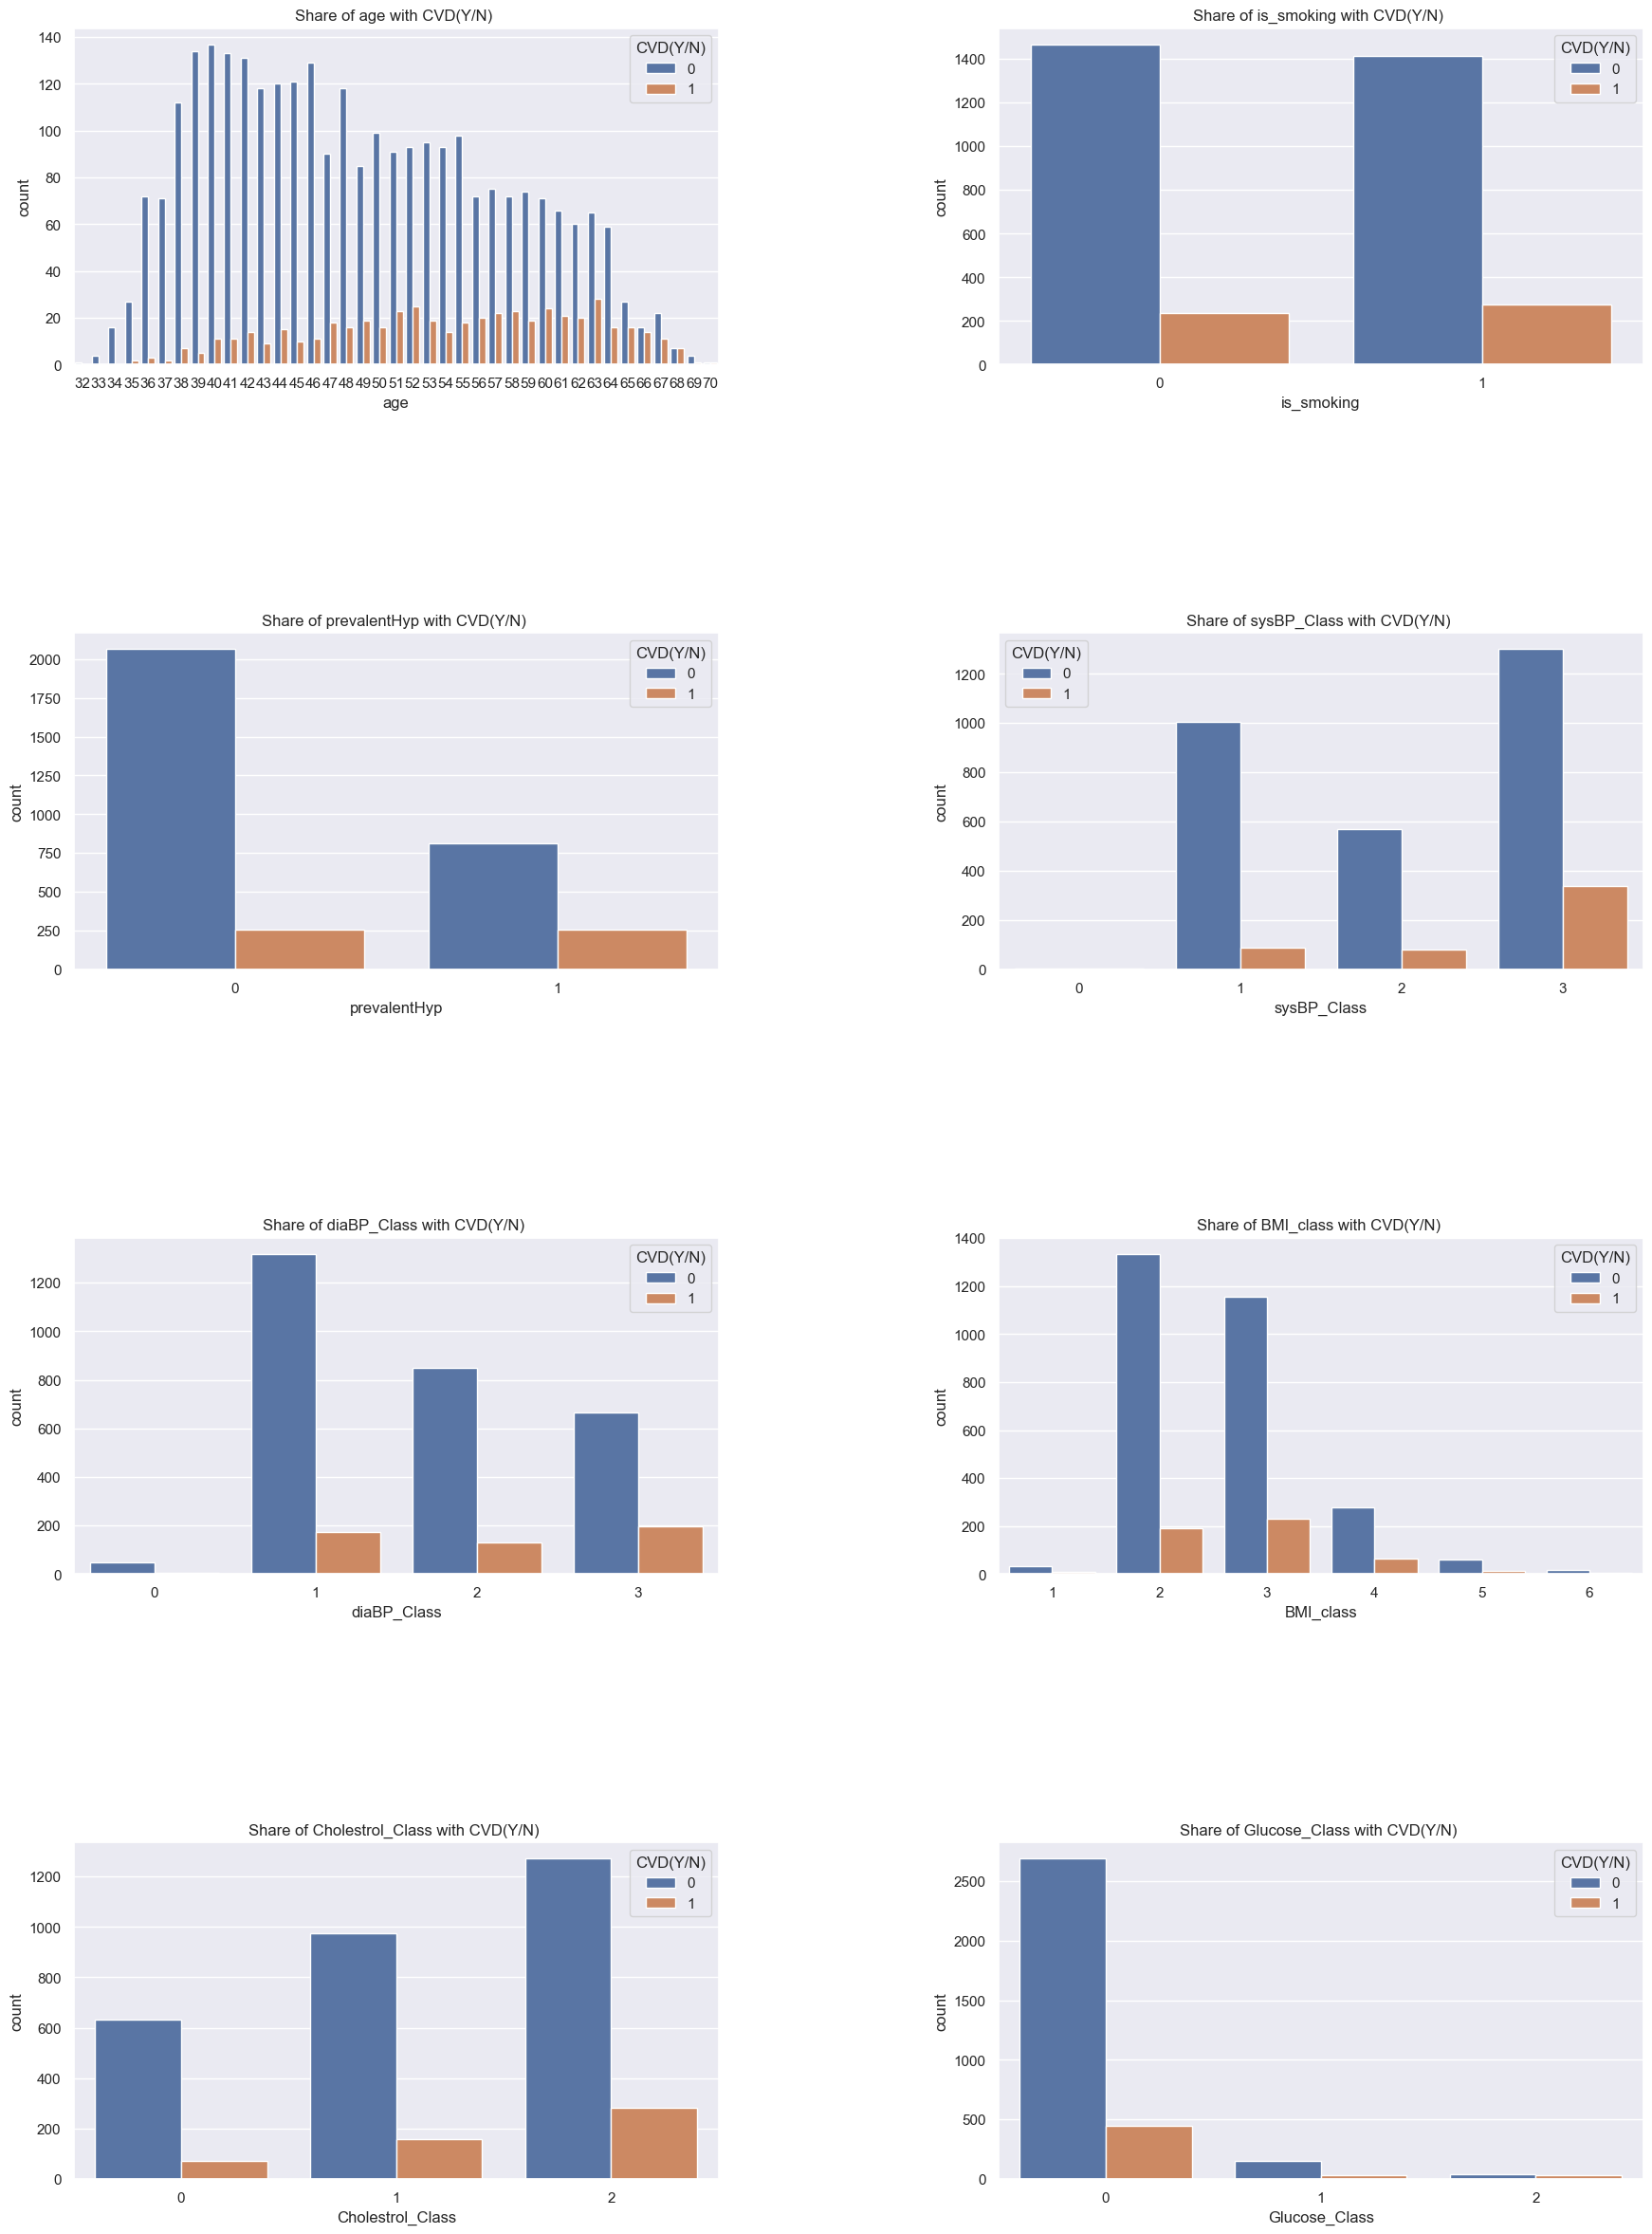

In [69]:
def freq_with_target(nrows,ncols,figsize,cols_to_plot,subplot_to_rotate='',rotate_labels=False,deg=30,sharex=False,sharey=False):
    fig,ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=figsize,sharex=sharex,sharey=sharey)
    ax = ax.flatten()
    # increase space for large ticklabels
    if rotate_labels:
        fig.tight_layout(pad=15.0)
    i = 0
    for col in df.columns:
        if col in cols_to_plot and col!='CVD(Y/N)':
            sns.countplot(x=col,data=df,ax=ax[i],hue='CVD(Y/N)')
            ax[i].set_title('Share of {} with CVD(Y/N) '.format(col))
            # rotation is needed wherever tick-labels are large
            if rotate_labels and col==subplot_to_rotate:
                ax[i].tick_params(labelrotation=deg)   
            i += 1
freq_with_target(nrows=4, ncols=2,figsize=(22,28),cols_to_plot=columns1,rotate_labels=True)

# Splitting the dataset in Independent and Dependent variables.

In [70]:
df.shape

(3390, 10)

In [71]:
x=df.drop(['CVD(Y/N)'],axis=1)

In [72]:
y=df['CVD(Y/N)']

# Handling imbalance dataset by using SMOTE/Oversampling method 

In [73]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
import imblearn

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(x_smote.shape)
print("\n")
print(y_smote.shape)
print('\n')
print(y_smote.value_counts())
print('\n')
print(y.value_counts())

(5758, 9)


(5758,)


1    2879
0    2879
Name: CVD(Y/N), dtype: int64


0    2879
1     511
Name: CVD(Y/N), dtype: int64


# Splitting the data into training and test for building the model and predicting with test data

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=101)

# Algorithms

# 1. Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier


In [79]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [82]:
confusion_matrix(y_test, y_pred_test)

array([[613, 253],
       [137, 725]])

In [83]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       866
           1       0.74      0.84      0.79       862

    accuracy                           0.77      1728
   macro avg       0.78      0.77      0.77      1728
weighted avg       0.78      0.77      0.77      1728



In [84]:
print("Training Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_train, y_pred_train)*100))
print("***************"*10)
print("Test Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_test, y_pred_test)*100))

Training Accuracy of DecisionTree is 94.09%
******************************************************************************************************************************************************
Test Accuracy of DecisionTree is 77.43%


# 2. Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier(n_estimators=1000,criterion='gini',oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True)

In [87]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [88]:
confusion_matrix(y_test, y_pred_rf_test)

array([[624, 242],
       [127, 735]])

In [89]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       866
           1       0.74      0.84      0.79       862

    accuracy                           0.77      1728
   macro avg       0.78      0.77      0.77      1728
weighted avg       0.78      0.77      0.77      1728



In [90]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_rf_train)*100))
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_rf_test)*100))

Training Accuracy of RandomForest is 94.09%
******************************************************************************************************************************************************
Test Accuracy of RandomForest is 78.65%


# 3. Support Vector Machine

In [91]:
from sklearn import svm
svm1=svm.SVC()
svm1=svm1.fit(x_train, y_train)

In [92]:
y_pred_svm_train = svm1.predict(x_train)
y_pred_svm_test = svm1.predict(x_test)

In [93]:
confusion_matrix(y_test, y_pred_svm_test)

array([[467, 399],
       [233, 629]])

In [94]:
print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.67      0.54      0.60       866
           1       0.61      0.73      0.67       862

    accuracy                           0.63      1728
   macro avg       0.64      0.63      0.63      1728
weighted avg       0.64      0.63      0.63      1728



In [95]:
print("Train Accuracy", accuracy_score(y_train, y_pred_svm_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_svm_test))

Train Accuracy 0.6421836228287842
*****************************************************
Test Accuracy 0.6342592592592593


# 4. KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5)  
knn1=classifier.fit(x_train, y_train) 

In [97]:
y_train_knn = knn1.predict(x_train)
y_test_knn = knn1.predict(x_test)

In [98]:
confusion_matrix(y_test, y_test_knn)

array([[559, 307],
       [115, 747]])

In [99]:
print(classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       866
           1       0.71      0.87      0.78       862

    accuracy                           0.76      1728
   macro avg       0.77      0.76      0.75      1728
weighted avg       0.77      0.76      0.75      1728



In [100]:
print("Training Accuracy of Logit is {:.2f}%".format(accuracy_score(y_train, y_train_knn)*100))
print("***************"*10)
print("Test Accuracy of Logit is {:.2f}%".format(accuracy_score(y_test, y_test_knn)*100))

Training Accuracy of Logit is 84.09%
******************************************************************************************************************************************************
Test Accuracy of Logit is 75.58%


# 5. Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [103]:
y_train_lg = log.predict(x_train)
y_test_lg = log.predict(x_test)

In [104]:
confusion_matrix(y_test, y_test_lg)

array([[521, 345],
       [304, 558]])

In [105]:
print(classification_report(y_test, y_test_lg))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62       866
           1       0.62      0.65      0.63       862

    accuracy                           0.62      1728
   macro avg       0.62      0.62      0.62      1728
weighted avg       0.62      0.62      0.62      1728



In [106]:
print("Training Accuracy of Logit is {:.2f}%".format(accuracy_score(y_train, y_train_lg)*100))
print("***************"*10)
print("Test Accuracy of Logit is {:.2f}%".format(accuracy_score(y_test, y_test_lg)*100))

Training Accuracy of Logit is 64.94%
******************************************************************************************************************************************************
Test Accuracy of Logit is 62.44%


# 6. Gradient Boosting Classifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
gb = gb.fit(x_train, y_train)

In [108]:
y_pred_gb_train =gb.predict(x_train)
y_pred_gb_test = gb.predict(x_test)

In [109]:
confusion_matrix(y_test, y_pred_gb_test)

array([[522, 344],
       [238, 624]])

In [110]:
print(classification_report(y_test, y_pred_gb_test))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       866
           1       0.64      0.72      0.68       862

    accuracy                           0.66      1728
   macro avg       0.67      0.66      0.66      1728
weighted avg       0.67      0.66      0.66      1728



In [111]:
print("Train Accuracy", accuracy_score(y_train, y_pred_gb_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_gb_test))

Train Accuracy 0.6955334987593053
*****************************************************
Test Accuracy 0.6631944444444444


# 7. XGB

In [112]:
!pip install xgboost

In [113]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)

In [114]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

In [115]:
confusion_matrix(y_test, y_pred_xgb_test)

array([[631, 235],
       [161, 701]])

In [116]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       866
           1       0.75      0.81      0.78       862

    accuracy                           0.77      1728
   macro avg       0.77      0.77      0.77      1728
weighted avg       0.77      0.77      0.77      1728



In [117]:
print("Train Accuracy", accuracy_score(y_train, y_pred_xgb_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, y_pred_xgb_test))

Train Accuracy 0.8816377171215881
*****************************************************
Test Accuracy 0.7708333333333334


# ROC-AUC Curve for Above Algorithms

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,log.predict(x_test))

In [119]:
clf_tree = DecisionTreeClassifier();
clf_reg = LogisticRegression();
clf_DT = RandomForestClassifier(n_estimators=1000,criterion='gini',oob_score=True);
clf_knn= KNeighborsClassifier(n_neighbors=5) 
clf_gb = GradientBoostingClassifier(random_state=1)
clf_svm=svm.SVC()
clf_xgb=XGBClassifier()
clf_tree.fit(x_train, y_train); 
clf_reg.fit(x_train, y_train);
clf_DT.fit(x_train, y_train);
clf_knn.fit(x_train, y_train);
clf_gb.fit(x_train, y_train);
clf_svm.fit(x_train, y_train);
clf_xgb.fit(x_train, y_train);

In [120]:
y_score1 = clf_tree.predict_proba(x_test)[:,1]
y_score2 = clf_reg.predict_proba(x_test)[:,1]
y_score3 = clf_DT.predict_proba(x_test)[:,1]
y_score4 = clf_knn.predict_proba(x_test)[:,1]
y_score5 = clf_gb.predict_proba(x_test)[:,1]
y_score6 = clf_svm.predict(x_test)
y_score7 = clf_xgb.predict(x_test)

In [121]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, y_score7)

In [122]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score4))
print('roc_auc_score for GB: ', roc_auc_score(y_test, y_score5))
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score6))
print('roc_auc_score for XGB: ', roc_auc_score(y_test, y_score7))

roc_auc_score for DecisionTree:  0.7862254384507804
roc_auc_score for Logistic Regression:  0.6808117166694352
roc_auc_score for Random Forest:  0.8699892296233582
roc_auc_score for KNN:  0.8319372478204723
roc_auc_score for GB:  0.7207237318015464
roc_auc_score for SVM:  0.6344796729234875
roc_auc_score for XGB:  0.7709312356997797


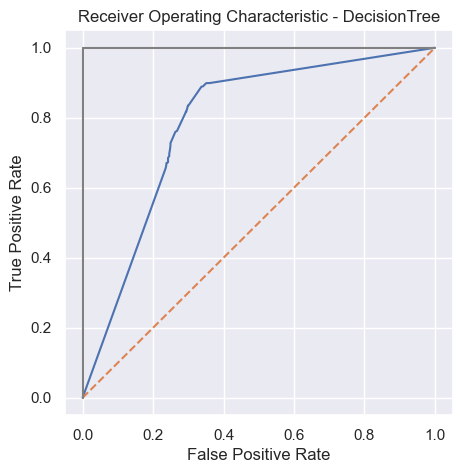

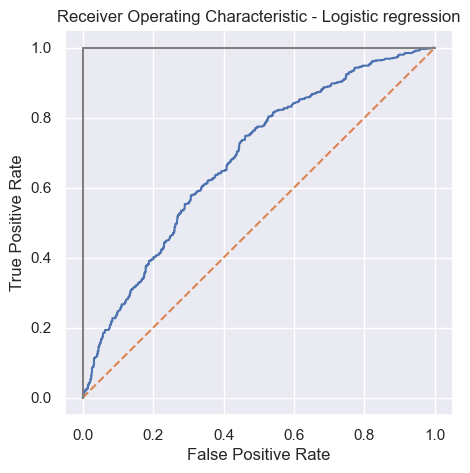

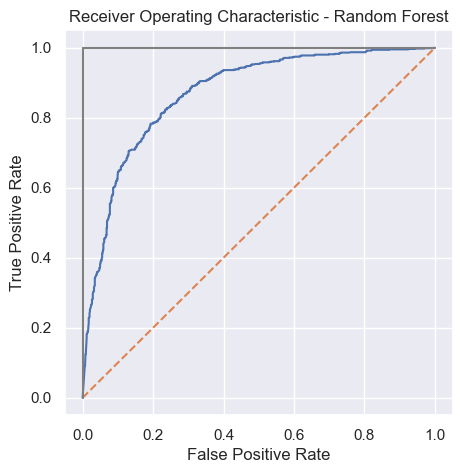

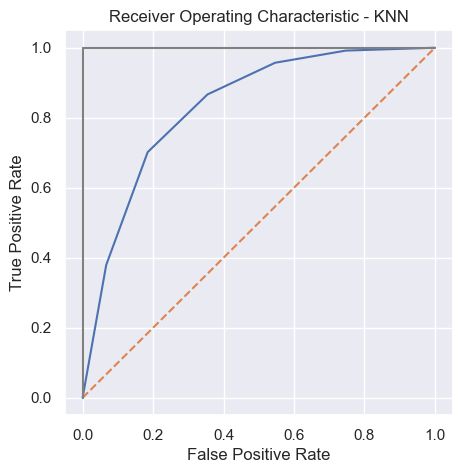

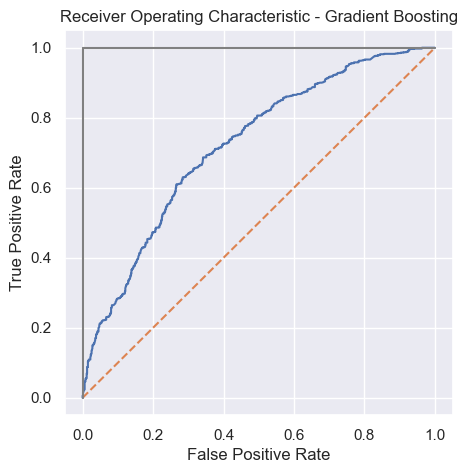

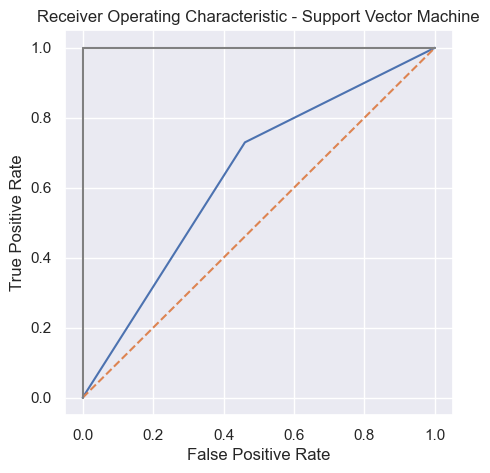

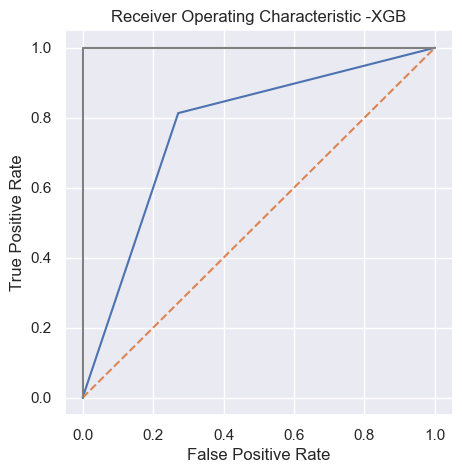

In [123]:
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Random Forest')
    plt.plot(false_positive_rate3, true_positive_rate3)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - KNN')
    plt.plot(false_positive_rate4, true_positive_rate4)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Gradient Boosting')
    plt.plot(false_positive_rate5, true_positive_rate5)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - Support Vector Machine')
    plt.plot(false_positive_rate6, true_positive_rate6)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic -XGB')
    plt.plot(false_positive_rate7, true_positive_rate7)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [124]:
DT=['Decision Tree',94.34,76.62,79.56]
RF=['Random Forest',94.34,78.30,86.55]
LR=['Logistic Regression',63.67,63.54,68.36]
GB=['Gradient Booster',69.28,67.41,73.10]
XGB=['XG Boost',88.36,76.44,76.45]
SVM=['Support Vector Machine',63.64,63.77,63.80]
KNN=['KNN',84.37,74.19,81.84]
Table=pd.DataFrame([RF,DT,XGB,KNN,GB,LR,SVM])
Table.columns=['Model_Name','Training_Accuracy(%)','Testing_Accuracy(%)','roc_auc_score(%)']
Table

,Model_Name,Training_Accuracy(%),Testing_Accuracy(%),roc_auc_score(%)
0,Random Forest,94.34,78.30,86.55
1,Decision Tree,94.34,76.62,79.56
2,XG Boost,88.36,76.44,76.45
3,KNN,84.37,74.19,81.84
4,Gradient Booster,69.28,67.41,73.10
5,Logistic Regression,63.67,63.54,68.36
6,Support Vector Machine,63.64,63.77,63.80


In [2]:
list1=[5,7,9,8,3]

In [3]:
list2=list1[::-1]

In [4]:
print(list2)

[3, 8, 9, 7, 5]


In [134]:
list1=[i for i in range(1,11)]

In [135]:
list1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]